In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (16, 6)

In [2]:
# load and combine data (and save it again)
import pandas as pd

# metadata
annotation = pd.read_csv('/home/jvdzwaan/data/tmp/annotation.csv', index_col=0)
corpus_big = pd.read_csv('/home/jvdzwaan/data/tmp/corpus_big.csv', index_col=0)
ceneton = pd.read_csv('/home/jvdzwaan/data/tmp/ceneton.csv', index_col=0)
edbo = pd.read_csv('/home/jvdzwaan/data/tmp/edbo.csv', index_col=0)
combined = pd.read_csv('/home/jvdzwaan/data/tmp/combined.csv', index_col=0)
complete = pd.read_csv('/home/jvdzwaan/data/tmp/complete.csv', index_col=0)

# emotions2bodyparts
em2body_annotation = pd.read_csv('/home/jvdzwaan/data/embem/dict/annotation_emotion2bodyparts.csv', index_col=0)
em2body_corpus_big = pd.read_csv('/home/jvdzwaan/data/embem/dict/corpus_big_emotion2bodyparts.csv', index_col=0)
em2body_ceneton = pd.read_csv('/home/jvdzwaan/data/embem/dict/ceneton_emotion2bodyparts.csv', index_col=0)
em2body_edbo = pd.read_csv('/home/jvdzwaan/data/embem/dict/edbo_emotion2bodyparts.csv', index_col=0)

em2body_annotation_cl = pd.read_csv('/home/jvdzwaan/data/embem/dict/annotation_emotion2bodyparts_classicism.csv', index_col=0)
em2body_annotation_en = pd.read_csv('/home/jvdzwaan/data/embem/dict/annotation_emotion2bodyparts_enlightenment.csv', index_col=0)
em2body_annotation_re = pd.read_csv('/home/jvdzwaan/data/embem/dict/annotation_emotion2bodyparts_renaissance.csv', index_col=0)

em2body_corpus_big_cl = pd.read_csv('/home/jvdzwaan/data/embem/dict/corpus_big_emotion2bodyparts_classicism.csv', index_col=0)
em2body_corpus_big_en = pd.read_csv('/home/jvdzwaan/data/embem/dict/corpus_big_emotion2bodyparts_enlightenment.csv', index_col=0)
em2body_corpus_big_re = pd.read_csv('/home/jvdzwaan/data/embem/dict/corpus_big_emotion2bodyparts_renaissance.csv', index_col=0)

em2body_ceneton_en = pd.read_csv('/home/jvdzwaan/data/embem/dict/ceneton_emotion2bodyparts_enlightenment.csv', index_col=0)
em2body_edbo_en = pd.read_csv('/home/jvdzwaan/data/embem/dict/edbo_emotion2bodyparts_enlightenment.csv', index_col=0)

# combine datasets
em2body_complete = em2body_annotation.add(em2body_corpus_big.add(em2body_ceneton.add(em2body_edbo, fill_value=0), fill_value=0), fill_value=0)
em2body_combined = em2body_corpus_big.add(em2body_ceneton.add(em2body_edbo, fill_value=0), fill_value=0)

em2body_complete_re = em2body_annotation_re.add(em2body_corpus_big_re, fill_value=0)
em2body_combined_re = em2body_corpus_big_re

em2body_complete_cl = em2body_annotation_cl.add(em2body_corpus_big_cl, fill_value=0)
em2body_combined_cl = em2body_corpus_big_cl

em2body_complete_en = em2body_annotation_en.add(em2body_corpus_big_en.add(em2body_ceneton_en.add(em2body_edbo_en, fill_value=0), fill_value=0), fill_value=0)
em2body_combined_en = em2body_corpus_big_en.add(em2body_ceneton_en.add(em2body_edbo_en, fill_value=0), fill_value=0)

# add normalizing constant (sum of pairs per emotion label)
em2body_complete.loc[:, 'total'] = em2body_complete.sum(axis=1)
em2body_combined.loc[:, 'total'] = em2body_combined.sum(axis=1)

em2body_complete_re.loc[:, 'total'] = em2body_complete_re.sum(axis=1)
em2body_combined_re.loc[:, 'total'] = em2body_combined_re.sum(axis=1)

em2body_complete_cl.loc[:, 'total'] = em2body_complete_cl.sum(axis=1)
em2body_combined_cl.loc[:, 'total'] = em2body_combined_cl.sum(axis=1)

em2body_complete_en.loc[:, 'total'] = em2body_complete_en.sum(axis=1)
em2body_combined_en.loc[:, 'total'] = em2body_combined_en.sum(axis=1)

# save combined datasets
em2body_complete.to_csv('/home/jvdzwaan/data/tmp/em2body_complete.csv')
em2body_combined.to_csv('/home/jvdzwaan/data/tmp/em2body_combined.csv')

em2body_complete_re.to_csv('/home/jvdzwaan/data/tmp/em2body_complete_re.csv')
em2body_combined_re.to_csv('/home/jvdzwaan/data/tmp/em2body_combined_re.csv')

em2body_complete_cl.to_csv('/home/jvdzwaan/data/tmp/em2body_complete_cl.csv')
em2body_combined_cl.to_csv('/home/jvdzwaan/data/tmp/em2body_combined_cl.csv')

em2body_complete_en.to_csv('/home/jvdzwaan/data/tmp/em2body_complete_en.csv')
em2body_combined_en.to_csv('/home/jvdzwaan/data/tmp/em2body_combined_cl.csv')

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=medium. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=x-large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


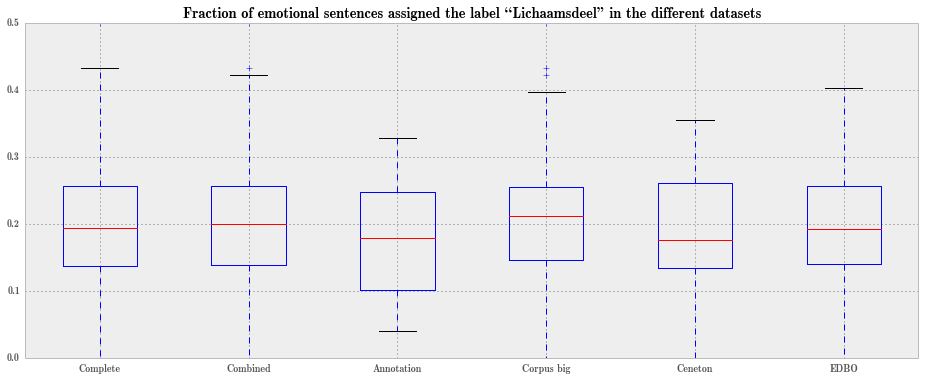

In [3]:
complete.loc[:, 'frac_embodied'] = complete.apply(lambda row: (row['#body_parts']+0.0)/row['#emotional'], axis=1)
combined.loc[:, 'frac_embodied'] = combined.apply(lambda row: (row['#body_parts']+0.0)/row['#emotional'], axis=1)
annotation.loc[:, 'frac_embodied'] = annotation.apply(lambda row: (row['#body_parts']+0.0)/row['#emotional'], axis=1)
corpus_big.loc[:, 'frac_embodied'] = corpus_big.apply(lambda row: (row['#body_parts']+0.0)/row['#emotional'], axis=1)
ceneton.loc[:, 'frac_embodied'] = ceneton.apply(lambda row: (row['#body_parts']+0.0)/row['#emotional'], axis=1)
edbo.loc[:, 'frac_embodied'] = edbo.apply(lambda row: (row['#body_parts']+0.0)/row['#emotional'], axis=1)

data = [complete['frac_embodied'], combined['frac_embodied'], annotation['frac_embodied'], corpus_big['frac_embodied'], ceneton['frac_embodied'], edbo['frac_embodied']]
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6],['Complete', 'Combined', 'Annotation', 'Corpus big','Ceneton','EDBO'])
plt.title('Fraction of emotional sentences assigned the label ``Lichaamsdeel" in the different datasets');

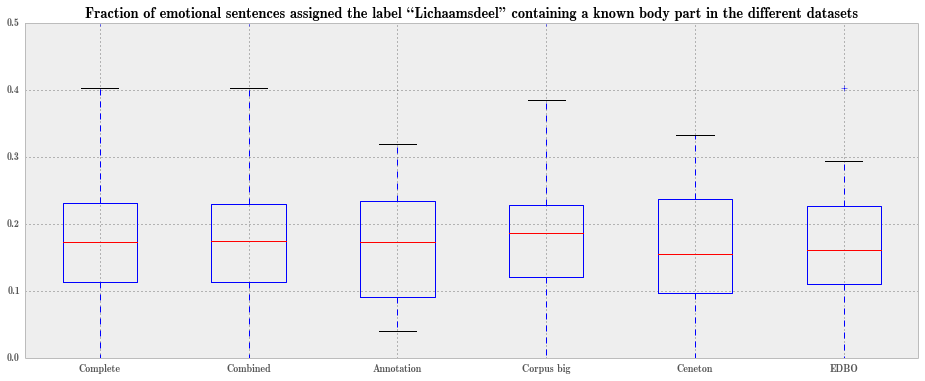

In [4]:
complete.loc[:, 'frac_embodied_bp'] = complete.apply(lambda row: (row['#replaced']+0.0)/row['#emotional'], axis=1)
combined.loc[:, 'frac_embodied_bp'] = combined.apply(lambda row: (row['#replaced']+0.0)/row['#emotional'], axis=1)
annotation.loc[:, 'frac_embodied_bp'] = annotation.apply(lambda row: (row['#replaced']+0.0)/row['#emotional'], axis=1)
corpus_big.loc[:, 'frac_embodied_bp'] = corpus_big.apply(lambda row: (row['#replaced']+0.0)/row['#emotional'], axis=1)
ceneton.loc[:, 'frac_embodied_bp'] = ceneton.apply(lambda row: (row['#replaced']+0.0)/row['#emotional'], axis=1)
edbo.loc[:, 'frac_embodied_bp'] = edbo.apply(lambda row: (row['#replaced']+0.0)/row['#emotional'], axis=1)

data = [complete['frac_embodied_bp'], combined['frac_embodied_bp'], annotation['frac_embodied_bp'], corpus_big['frac_embodied_bp'], ceneton['frac_embodied_bp'], edbo['frac_embodied_bp']]
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6],['Complete', 'Combined', 'Annotation', 'Corpus big','Ceneton','EDBO'])
plt.title('Fraction of emotional sentences assigned the label ``Lichaamsdeel" containing a known body part in the different datasets');

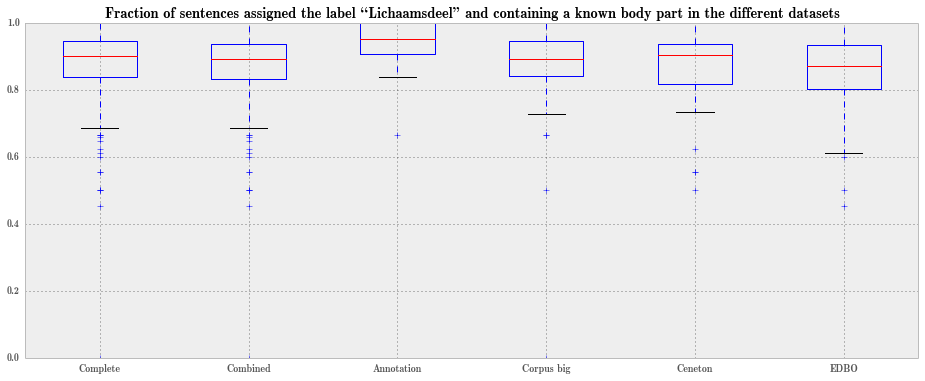

In [5]:
import numpy as np

complete.loc[:, 'frac_bp_found'] = complete.apply(lambda row: np.float64(row['#replaced'])/row['#body_parts'], axis=1)
combined.loc[:, 'frac_bp_found'] = combined.apply(lambda row: np.float64(row['#replaced'])/row['#body_parts'], axis=1)
annotation.loc[:, 'frac_bp_found'] = annotation.apply(lambda row: np.float64(row['#replaced'])/row['#body_parts'], axis=1)
corpus_big.loc[:, 'frac_bp_found'] = corpus_big.apply(lambda row: np.float64(row['#replaced'])/row['#body_parts'], axis=1)
ceneton.loc[:, 'frac_bp_found'] = ceneton.apply(lambda row: np.float64(row['#replaced'])/row['#body_parts'], axis=1)
edbo.loc[:, 'frac_bp_found'] = edbo.apply(lambda row: np.float64(row['#replaced'])/row['#body_parts'], axis=1)

complete = complete.replace([np.inf, -np.inf], 0)
combined = combined.replace([np.inf, -np.inf], 0)
annotation = annotation.replace([np.inf, -np.inf], 0)
corpus_big = corpus_big.replace([np.inf, -np.inf], 0)
ceneton = ceneton.replace([np.inf, -np.inf], 0)
edbo = edbo.replace([np.inf, -np.inf], 0)

data = [complete['frac_bp_found'], combined['frac_bp_found'], annotation['frac_bp_found'], corpus_big['frac_bp_found'], ceneton['frac_bp_found'], edbo['frac_bp_found']]
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6],['Complete', 'Combined', 'Annotation', 'Corpus big','Ceneton','EDBO'])
plt.title('Fraction of sentences assigned the label ``Lichaamsdeel" and containing a known body part in the different datasets');

In [6]:
def get_percentage_recognized_body_parts(df):
    return df['frac_bp_found'].mean()

print 'Percentages of recognized body parts'
print 'Complete\t', get_percentage_recognized_body_parts(complete)
print 'Combined\t', get_percentage_recognized_body_parts(combined)
print 'Annotation\t', get_percentage_recognized_body_parts(annotation)
print 'Corpus big\t', get_percentage_recognized_body_parts(corpus_big)
print 'Ceneton\t\t', get_percentage_recognized_body_parts(ceneton)
print 'EDBO\t\t', get_percentage_recognized_body_parts(edbo)

Percentages of recognized body parts
Complete	0.877137501926
Combined	0.869418519612
Annotation	0.94234959389
Corpus big	0.880785439862
Ceneton		0.853442166575
EDBO		0.851847398708


               Complete  Combined  Annotation
period                                       
renaissance    0.237768  0.243223    0.208679
classicism     0.187359  0.191452    0.154614
enlightenment  0.188896  0.189771    0.177815


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


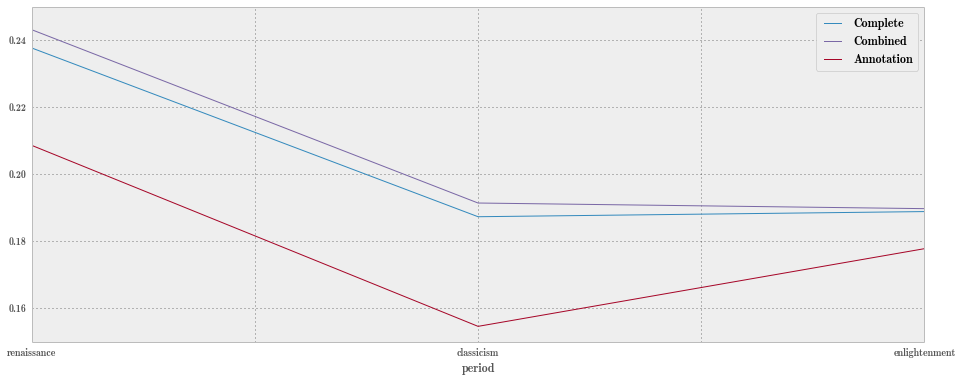

In [7]:
# Fraction of emotional sentences containing body parts (=fraction of emotional sentences containing embodied emotions)
# per time period

def get_embodied_per_period(df, name):
    df = df.copy()
    df.loc[:, name] = df['#body_parts']/df['#emotional']
    df = df.groupby('period').mean()
    df = df.reindex(['renaissance', 'classicism', 'enlightenment'])
    return df

#print get_embodied_per_period(complete, 'Complete')
df = pd.concat([get_embodied_per_period(complete, 'Complete'), get_embodied_per_period(combined, 'Combined'), get_embodied_per_period(annotation, 'Annotation')], axis=1)
df[['Complete', 'Combined', 'Annotation']].plot();
print df[['Complete', 'Combined', 'Annotation']]

In [8]:
from scipy import stats
import statsmodels.api as sm

def do_anova(df): 
    f_val, p_val = stats.f_oneway(df.groupby('period').get_group('renaissance')['frac_embodied'], df.groupby('period').get_group('classicism')['frac_embodied'], df.groupby('period').get_group('enlightenment')['frac_embodied'])
    print "P value ANOVA: {:10.10f}\n".format(p_val)
    
    if p_val < 0.05:
        result = sm.stats.multicomp.pairwise_tukeyhsd(df.frac_embodied, df.period)
        print(result.summary())

print 'Complete'
do_anova(complete)
print
print 'Combined'
do_anova(combined)
print
print 'Annotation'
do_anova(annotation)

Complete
P value ANOVA: 0.0006891213

    Multiple Comparison of Means - Tukey HSD,FWER=0.05    
    group1        group2    meandiff  lower  upper  reject
----------------------------------------------------------
  classicism  enlightenment  0.0015  -0.0259 0.029  False 
  classicism   renaissance   0.0504   0.0166 0.0842  True 
enlightenment  renaissance   0.0489   0.0163 0.0815  True 
----------------------------------------------------------

Combined
P value ANOVA: 0.0009403431

    Multiple Comparison of Means - Tukey HSD,FWER=0.05    
    group1        group2    meandiff  lower  upper  reject
----------------------------------------------------------
  classicism  enlightenment -0.0017  -0.0307 0.0273 False 
  classicism   renaissance   0.0518   0.0151 0.0885  True 
enlightenment  renaissance   0.0535   0.0183 0.0887  True 
----------------------------------------------------------

Annotation
P value ANOVA: 0.3578089092



Conclusie: Het aandeel embodied emotions in het totaal van gevonden emoties neemt significant af van renaissance naar classicism. Het verschil tussen enlightenment en renaissance is ook significant. Het verschil tussen classicism en enlightenment niet. Dit geldt voor de datasets complete en combined.

Opvallend: dit geldt niet voor de annotatieset, hoewel de verschillen groter lijken. Maar dat komt dan waarschijnlijk doordat er relatief weinig stukken in de annotatieset zitten.

Dus: we vinden relatief minder embodied emotions in classicism en enlightenment vergeleken met renaissance.

Ook vind ik het percentage emoties dat embodied is best wel laag (<25%). Opvallend detail.

In [9]:
# normalize data
em2body_complete = em2body_complete.div(em2body_complete.total, axis='index')
em2body_combined = em2body_complete.div(em2body_combined.total, axis='index')

em2body_complete_re = em2body_complete_re.div(em2body_complete_re.total, axis='index')
em2body_combined_re = em2body_complete_re.div(em2body_combined_re.total, axis='index')

em2body_complete_cl = em2body_complete_cl.div(em2body_complete_cl.total, axis='index')
em2body_combined_cl = em2body_complete_cl.div(em2body_combined_cl.total, axis='index')

em2body_complete_en = em2body_complete_en.div(em2body_complete_en.total, axis='index')
em2body_combined_en = em2body_complete_en.div(em2body_combined_en.total, axis='index')

# remove normalizing constant (no need to plot that)
em2body_complete.drop('total', axis=1, inplace=True)
em2body_combined.drop('total', axis=1, inplace=True)

em2body_complete_re.drop('total', axis=1, inplace=True)
em2body_combined_re.drop('total', axis=1, inplace=True)

em2body_complete_cl.drop('total', axis=1, inplace=True)
em2body_combined_cl.drop('total', axis=1, inplace=True)

em2body_complete_en.drop('total', axis=1, inplace=True)
em2body_combined_en.drop('total', axis=1, inplace=True)


# Changes in body parts

* What are the most important (most frequent) body parts?
    * Overall
    * Per time period
* What body parts become more important over time?
    * Statistically significant increase in frequency
* What body parts become less important over time?
    * Statistically significant decrease in frequency

In [10]:
em2body_complete

,Heart,Longs,Jaws,Ears,Mind,Head,Arms,Hair,Bones,Lips,...,Skull,Brain,Soul,Face,Sweat,Shins,Veins,Tongue,Womb,Blood
Achterdocht,0.493213,0.000000,0.000000,0.018100,0.027149,0.000000,0.013575,0.004525,0.004525,0.000000,...,0.000000,0.000000,0.076923,0.027149,0.004525,0.000000,0.000000,0.000000,0.000000,0.054299
Angst,0.333793,0.000552,0.001103,0.008828,0.037793,0.021793,0.018483,0.009103,0.000552,0.004138,...,0.000000,0.000000,0.096552,0.030621,0.004414,0.000276,0.003862,0.007448,0.004690,0.063724
Bedruktheid,0.445860,0.000000,0.000000,0.003185,0.028662,0.054140,0.006369,0.009554,0.000000,0.000000,...,0.000000,0.000000,0.047771,0.031847,0.000000,0.000000,0.000000,0.003185,0.003185,0.038217
Beledigd,0.270386,0.000000,0.000000,0.005722,0.041488,0.052933,0.025751,0.008584,0.002861,0.001431,...,0.000000,0.000000,0.141631,0.028612,0.001431,0.000000,0.001431,0.008584,0.002861,0.054363
Berusting,0.224490,0.000000,0.000000,0.013605,0.074830,0.034014,0.006803,0.027211,0.000000,0.000000,...,0.000000,0.000000,0.081633,0.013605,0.006803,0.000000,0.000000,0.006803,0.013605,0.034014
Bezorgdheid,0.434343,0.000000,0.001443,0.005772,0.067821,0.018759,0.008658,0.002886,0.000000,0.001443,...,0.000000,0.000000,0.154401,0.025974,0.000000,0.000000,0.001443,0.001443,0.001443,0.037518
Blijdschap,0.317720,0.000726,0.001452,0.012709,0.046115,0.030501,0.019608,0.003631,0.000363,0.004720,...,0.000000,0.000000,0.102760,0.027596,0.001452,0.000000,0.001452,0.007262,0.003631,0.041757
Eergevoel,0.248945,0.000000,0.000000,0.008439,0.071730,0.035162,0.040788,0.008439,0.001406,0.000000,...,0.000000,0.000000,0.070323,0.029536,0.008439,0.000000,0.002813,0.005626,0.002813,0.078762
Geluk,0.338200,0.000000,0.002433,0.009732,0.053528,0.017032,0.036496,0.002433,0.000000,0.000000,...,0.000000,0.000000,0.109489,0.021898,0.000000,0.000000,0.000000,0.000000,0.004866,0.031630
Gemis,0.328244,0.000000,0.000000,0.007634,0.045802,0.015267,0.038168,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.122137,0.015267,0.000000,0.000000,0.000000,0.000000,0.000000,0.030534


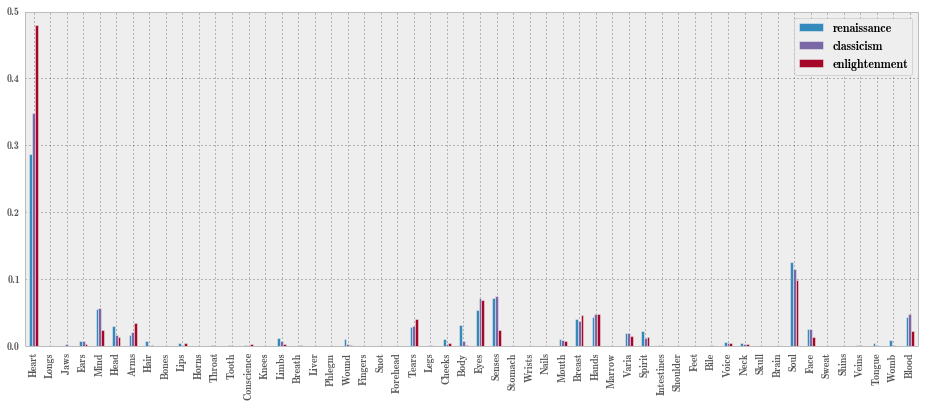

In [11]:
#def 


liefde = em2body_complete_re.loc['Liefde'].to_frame(name='renaissance')
liefde['classicism'] = em2body_complete_cl.loc['Liefde']
liefde['enlightenment'] = em2body_complete_en.loc['Liefde']

liefde.plot(kind='bar')